In [1]:
import glob
import pandas as pd
import os

In [2]:
def feature_counts(directory):
    fn = directory+ '/feature_names.txt'
    with open(fn) as f:
        lines = f.readlines()
        keep = int(lines[1].split('\t')[1])
        remove = int(lines[2].split('\t')[1])
    return keep, remove

In [3]:
def load_cv(top=None):
    results = []
    seeds=[]
    for seed_dir in glob.glob('data/ugr_experiment/*'):
        seed = int(seed_dir.split('_')[-1])
        seeds.append(seed)
        dfs = []
        for params_dir in glob.glob(seed_dir+'/*/'):
            fn= os.path.normpath(params_dir+'/cv_5_best_models_evaluation.csv')
            dirs = fn.split(os.sep)
            params = dirs[3].split('#')
            params.insert(0, seed)
            keep, remove = feature_counts(params_dir)
            params.append(keep)
            params.append(remove)

            df = pd.read_csv(fn)
            df.columns = ['kind', 'model'] + df.columns[2:].tolist()
            params = pd.DataFrame([params]*df.shape[0], columns=['seed', 'total or by type', 'time period', 'data scaling', 'feature selection', 'keep', 'remove'])
            df = pd.concat([params, df], axis=1)
            dfs.append(df)

        dfs = pd.concat(dfs, ignore_index=True).sort_values('test_f1', ascending=False)
        if top is not None:
            dfs = dfs.head(top)
        results.append(dfs)
    return pd.concat(results, ignore_index=True), seeds

In [4]:
%matplotlib inline

,seed,total or by type,time period,data scaling,feature selection,keep,remove,kind,model,test_acc,test_f1,test_mse,train_acc,train_f1,train_mse
0,0,TOTAL,~2016,max_cut,None,65,0,reg,GDBreg,0.698413,0.672936,0.406424,1.000000,1.000000,0.001223
1,0,NO_TOTAL,~2014,max_cut,mrmr,161,117,cls,GDBcls,0.698413,0.657790,0.444444,1.000000,1.000000,0.000000
2,0,NO_TOTAL,~2016,max_cut,rfecv_linsvc,33,202,cls,BAGcls,0.682540,0.657189,0.460317,1.000000,1.000000,0.000000
3,100,TOTAL,~2014,max_cut,rfecv_linsvc,40,25,cls,SVM,0.603175,0.611029,0.587302,0.824701,0.822274,0.235060
4,100,TOTAL,~2014,minmax_only,rfecv_linsvc,40,25,cls,MLPcls,0.571429,0.555556,0.476190,0.701195,0.684203,0.466135
5,100,NO_TOTAL,~2016,minmax_only,rfecv_linsvc,38,197,cls,linearSVM,0.539683,0.533865,0.952381,0.800797,0.799497,0.282869
6,168352,TOTAL,~2016,minmax_only,rfecv_linsvc,18,47,cls,logistics,0.666667,0.655987,0.650794,0.637450,0.630026,0.494024
7,168352,TOTAL,~2014,max_cut,mrmr,52,13,cls,BAGcls,0.634921,0.626114,0.682540,1.000000,1.000000,0.000000
8,168352,NO_TOTAL,~2016,max_cut,mrmr,169,66,cls,GDBcls,0.650794,0.625587,0.587302,1.000000,1.000000,0.000000
9,291592,TOTAL,~2016,minmax_only,rfecv_linsvc,25,40,cls,SVM,0.555556,0.533157,0.761905,0.733068,0.727446,0.326693


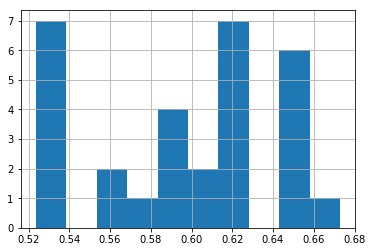

In [18]:
df, seeds = load_cv(3)
df = df.set_index(['seed', 'total or by type', 'time period', 'data scaling', 'feature selection'])

df.reset_index().test_f1.hist()
df.reset_index()

{'TOTAL': 19, 'NO_TOTAL': 11}
{'~2014': 16, '~2016': 14}
{'max_cut': 16, 'minmax_only': 14}
{'rfecv_linsvc': 14, 'None': 9, 'mrmr': 7}
{'GDBcls': 6, 'RFcls': 4, 'MLPcls': 3, 'SVM': 3, 'BAGcls': 3, 'linearSVM': 3, 'ols': 2, 'linearSVR': 1, 'ADAreg': 1, 'GDBreg': 1, 'MLPreg': 1, 'DTcls': 1, 'logistics': 1}


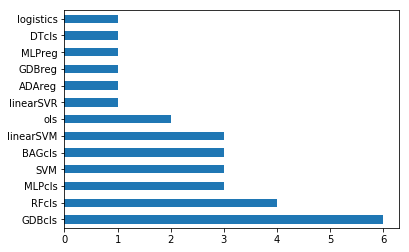

In [19]:
df2 = df.reset_index()
print(df2['total or by type'].value_counts().to_dict())
print(df2['time period'].value_counts().to_dict())
print(df2['data scaling'].value_counts().to_dict())
print(df2['feature selection'].value_counts().to_dict())
print(df2.model.value_counts().to_dict())
df2.model.value_counts().plot(kind='barh')

In [10]:
df.loc[100]

keep  remove kind   model  \
total_or_not years transform   ftr_sel                                   
NO_TOTAL     ~2016 max_cut     None           178       0  cls  GDBcls   
                   minmax_only None           178       0  cls  GDBcls   
                   max_cut     rfecv_linsvc   147      31  cls  GDBcls   

                                             test_acc   test_f1  test_mse  \
total_or_not years transform   ftr_sel                                      
NO_TOTAL     ~2016 max_cut     None          0.734487  0.727970  0.553215   
                   minmax_only None          0.732982  0.726508  0.564498   
                   max_cut     rfecv_linsvc  0.731102  0.724759  0.568259   

                                             train_acc  train_f1  train_mse  
total_or_not years transform   ftr_sel                                       
NO_TOTAL     ~2016 max_cut     None                1.0       1.0        0.0  
                   minmax_only None                1.0       1.0        0.0  
                   max_cut     rfecv_linsvc        1.0       1.0        0.0

In [11]:
df.sort_values('test_f1', ascending=False)

keep  remove kind  \
seed      total_or_not years transform   ftr_sel                           
972       NO_TOTAL     ~2016 minmax_only rfecv_linsvc   137      41  cls   
                       ~2014 minmax_only None           230       0  cls   
                       ~2016 minmax_only None           178       0  cls   
789729423 NO_TOTAL     ~2016 max_cut     None           178       0  cls   
100       NO_TOTAL     ~2016 max_cut     None           178       0  cls   
789729423 NO_TOTAL     ~2016 minmax_only rfecv_linsvc   178       0  cls   
100       NO_TOTAL     ~2016 minmax_only None           178       0  cls   
789729423 NO_TOTAL     ~2014 max_cut     None           230       0  cls   
100       NO_TOTAL     ~2016 max_cut     rfecv_linsvc   147      31  cls   
5258      NO_TOTAL     ~2014 max_cut     None           230       0  cls   
0         NO_TOTAL     ~2014 max_cut     rfecv_linsvc   194      36  cls   
5258      NO_TOTAL     ~2014 max_cut     mrmr           176      54  cls   
                             minmax_only None           230       0  cls   
7821      NO_TOTAL     ~2016 max_cut     None           178       0  cls   
0         NO_TOTAL     ~2014 minmax_only None           230       0  cls   
                             max_cut     None           230       0  cls   
7821      NO_TOTAL     ~2016 max_cut     rfecv_linsvc   145      33  cls   
291592    NO_TOTAL     ~2014 max_cut     mrmr           176      54  cls   
40918     NO_TOTAL     ~2016 max_cut     None           178       0  cls   
291592    NO_TOTAL     ~2014 max_cut     None           230       0  cls   
7821      NO_TOTAL     ~2016 minmax_only None           178       0  cls   
168352    NO_TOTAL     ~2014 minmax_only None           230       0  cls   
                       ~2016 minmax_only rfecv_linsvc   135      43  cls   
                             max_cut     None           178       0  cls   
40918     NO_TOTAL     ~2016 minmax_only None           178       0  cls   
291592    NO_TOTAL     ~2016 max_cut     mrmr           150      28  cls   
57852     NO_TOTAL     ~2016 minmax_only rfecv_linsvc   140      38  cls   
                             max_cut     rfecv_linsvc   131      47  cls   
40918     NO_TOTAL     ~2016 max_cut     rfecv_linsvc   139      39  cls   
57852     NO_TOTAL     ~2016 max_cut     None           178       0  cls   

                                                        model  test_acc  \
seed      total_or_not years transform   ftr_sel                          
972       NO_TOTAL     ~2016 minmax_only rfecv_linsvc  GDBcls  0.743889   
                       ~2014 minmax_only None          GDBcls  0.742384   
                       ~2016 minmax_only None          GDBcls  0.740504   
789729423 NO_TOTAL     ~2016 max_cut     None          GDBcls  0.737119   
100       NO_TOTAL     ~2016 max_cut     None          GDBcls  0.734487   
789729423 NO_TOTAL     ~2016 minmax_only rfecv_linsvc  GDBcls  0.735239   
100       NO_TOTAL     ~2016 minmax_only None          GDBcls  0.732982   
789729423 NO_TOTAL     ~2014 max_cut     None          GDBcls  0.734863   
100       NO_TOTAL     ~2016 max_cut     rfecv_linsvc  GDBcls  0.731102   
5258      NO_TOTAL     ~2014 max_cut     None          GDBcls  0.732230   
0         NO_TOTAL     ~2014 max_cut     rfecv_linsvc  GDBcls  0.730726   
5258      NO_TOTAL     ~2014 max_cut     mrmr          GDBcls  0.729598   
                             minmax_only None          GDBcls  0.729598   
7821      NO_TOTAL     ~2016 max_cut     None          GDBcls  0.727341   
0         NO_TOTAL     ~2014 minmax_only None          GDBcls  0.725837   
                             max_cut     None          GDBcls  0.725461   
7821      NO_TOTAL     ~2016 max_cut     rfecv_linsvc  GDBcls  0.723956   
291592    NO_TOTAL     ~2014 max_cut     mrmr          GDBcls  0.722828   
40918     NO_TOTAL     ~2016 max_cut     None          GDBcls  0.723204   
291592    NO_TOTAL     ~2014 max_cut     None  